<div style="display:flex; justify-content: center; background-color: #8038DB">
<h1 style="margin:auto;  padding: 25px;">
Exploratory Data Analysis 
</h1>
</div>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', False)
pd.set_option('display.max_rows', False)
pd.options.display.max_columns = False
pd.options.display.max_rows = False
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
train = pd.read_csv("./data/train_data.csv")
train.shape

(16512, 11)

In [7]:
train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16472,16473,16474,16475,16476,16477,16478,16479,16480,16481,16482,16483,16484,16485,16486,16487,16488,16489,16490,16491,16492,16493,16494,16495,16496,16497,16498,16499,16500,16501,16502,16503,16504,16505,16506,16507,16508,16509,16510,16511
Unnamed: 0,2072,10600,2494,4284,16541,8781,5438,14856,19956,17175,5305,1686,6100,11206,3400,4646,15828,12263,17343,20157,5963,7049,8593,15164,4413,1660,15566,8965,13847,18985,11259,10708,13197,5723,14785,19999,11232,4355,5300,7923,...,12680,12794,6792,14119,19775,20627,12420,19694,17972,3664,10690,16415,17759,7622,20164,9541,16639,20026,15905,8170,14695,20531,13414,19111,20084,8316,6548,19162,11071,5167,2773,10827,433,11527,14696,1099,18898,11798,6637,2575
longitude,-119.84,-117.8,-120.19,-118.32,-121.23,-118.32,-118.43,-117.07,-119.33,-122.47,-118.46,-122.26,-117.89,-117.92,-118.35,-118.31,-122.43,-116.89,-120.41,-119.15,-117.85,-118.04,-118.37,-117.02,-118.25,-121.94,-117.05,-118.39,-117.34,-121.94,-117.97,-117.71,-117.7,-118.23,-117.12,-119.31,-117.96,-118.39,-118.45,-118.08,...,-121.39,-121.46,-118.15,-117.09,-122.2,-121.32,-116.2,-121.62,-121.95,-118.37,-117.71,-121.26,-121.84,-118.25,-119.28,-120.74,-120.65,-119.05,-122.41,-118.12,-117.11,-121.81,-117.47,-122.64,-120.27,-118.32,-118.02,-122.69,-117.85,-118.29,-115.95,-117.92,-122.29,-118.08,-117.09,-121.9,-122.25,-121.22,-118.14,-124.13
latitude,36.77,33.68,36.6,34.1,37.79,33.79,34.01,32.64,36.22,37.5,34.07,37.98,34.12,33.83,34.28,34.06,37.75,33.79,34.86,34.44,34.11,33.93,33.88,32.95,34.08,37.94,33.1,34.0,34.49,38.27,33.81,33.61,34.07,34.18,32.58,36.06,33.82,34.09,34.07,33.86,...,38.55,38.64,34.08,32.75,39.93,39.13,33.7,39.12,37.32,34.23,33.61,37.88,37.34,33.86,34.45,37.33,35.29,36.06,37.74,33.81,32.78,38.58,34.07,38.23,38.02,33.33,34.05,38.34,33.83,33.94,33.28,33.68,37.88,33.77,32.79,39.59,38.11,38.92,34.16,40.8
housing_median_age,6.0,8.0,25.0,31.0,21.0,32.0,31.0,32.0,9.0,18.0,42.0,28.0,35.0,36.0,30.0,34.0,52.0,12.0,15.0,33.0,25.0,36.0,44.0,25.0,47.0,26.0,13.0,35.0,9.0,35.0,30.0,26.0,33.0,45.0,34.0,20.0,32.0,41.0,19.0,29.0,...,25.0,20.0,48.0,30.0,9.0,5.0,26.0,26.0,20.0,32.0,25.0,42.0,27.0,26.0,36.0,30.0,36.0,23.0,52.0,36.0,16.0,17.0,24.0,49.0,13.0,52.0,28.0,12.0,26.0,34.0,12.0,28.0,46.0,26.0,36.0,20.0,49.0,19.0,39.0,31.0
total_rooms,1853.0,2032.0,875.0,622.0,1922.0,2381.0,2526.0,5135.0,3748.0,2297.0,2564.0,2038.0,1470.0,1072.0,3214.0,1848.0,2700.0,701.0,978.0,2005.0,9255.0,1045.0,1325.0,1909.0,2133.0,1299.0,5516.0,1465.0,3293.0,10869.0,2406.0,2280.0,1552.0,2332.0,2003.0,2236.0,2856.0,730.0,4845.0,1018.0,...,2171.0,1517.0,3697.0,1899.0,1296.0,358.0,2399.0,1405.0,1145.0,1444.0,3004.0,465.0,2512.0,3022.0,2376.0,2390.0,1940.0,2344.0,831.0,1665.0,2220.0,1964.0,1017.0,2300.0,3839.0,2127.0,991.0,3876.0,1904.0,1089.0,99.0,3397.0,1895.0,2461.0,1529.0,1465.0,2365.0,2531.0,2776.0,2152.0
total_bedrooms,473.0,349.0,214.0,229.0,373.0,467.0,528.0,1025.0,644.0,416.0,460.0,329.0,241.0,193.0,513.0,667.0,595.0,130.0,187.0,392.0,1659.0,239.0,245.0,334.0,689.0,174.0,746.0,386.0,585.0,2226.0,462.0,550.0,288.0,NaN,466.0,434.0,622.0,126.0,1609.0,235.0,...,431.0,323.0,816.0,546.0,287.0,65.0,625.0,204.0,198.0,317.0,718.0,93.0,526.0,476.0,541.0,470.0,315.0,407.0,175.0,291.0,512.0,314.0,227.0,463.0,715.0,512.0,255.0,782.0,292.0,278.0,25.0,597.0,442.0,562.0,266.0,278.0,504.0,461.0,840.0,462.0
population,1397.0,862.0,931.0,597.0,1130.0,1264.0,1046.0,2152.0,1955.0,1086.0,913.0,947.0,885.0,639.0,1700.0,1351.0,1181.0,434.0,407.0,1043.0,4944.0,1165.0,669.0,1043.0,2104.0,533.0,2119.0,1104.0,1678.0,9879.0,1753.0,669.0,1326.0,943.0,1226.0,1405.0,1499.0,230.0,3751.0,684.0,...,1053.0,1287.0,2446.0,1620.0,768.0,169.0,2654.0,627.0,431.0,1177.0,891.0,256.0,3033.0,1852.0,1505.0,1409.0,850.0,1184.0,415.0,721.0,930.0,808.0,568.0,1061.0,1486.0,733.0,1145.0,2146.0,945.0,995.0,37.0,1397.0,920.0,971.0,683.0,745.0,1131.0,1206.0,2546.0,1259.0
households,417.0,340.0,214.0,

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16512.0,10295.498789,5941.973488,0.0000,5178.7500,10263.5000,15438.250000,20639.0000
longitude,16512.0,-119.564046,2.005033,-124.3500,-121.7900,-118.4900,-118.010000,-114.3100
latitude,16512.0,35.626523,2.139150,32.5400,33.9300,34.2500,37.710000,41.9500
housing_median_age,16512.0,28.624516,12.597980,1.0000,18.0000,29.0000,37.000000,52.0000
total_rooms,16512.0,2644.170603,2213.946369,6.0000,1446.0000,2116.0000,3154.000000,39320.0000
total_bedrooms,16336.0,539.319540,425.207704,2.0000,296.0000,435.0000,647.000000,6445.0000
population,16512.0,1435.017260,1158.151967,3.0000,788.0000,1168.0000,1738.000000,35682.0000
households,16512.0,501.135962,385.650673,2.0000,280.0000,410.0000,606.000000,6082.0000
median_income,16512.0,3.864091,1.893244,0.4999,2.5625,3.5313,4.733225,15.0001
median_house_value,16512.0,206509.251453,115225.957661,14999.0000,119400.0000,179300.0000,264500.000000,500001.0000


In [21]:
train.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


<div style="padding: 1%;border-style: dotted; border-width: 1px; border-color: #8038DB;">
<p> Traitement des valeurs manquantes : 
<ul>
<li> récupérer le nombre de valeurs manquantes par colonne</li>
<li> nombre total de valeurs manquantes  </li>
<li> pourcentage de valeurs manquantes </li>
<li> comprendre pourquoi les valeurs sont manquantes </li>
<li> suppression ou imputation des valeurs manquantes </li>
</ul>
</p>
</div>

In [14]:
missing_data = train.isnull().sum()
missing_data

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
total_cells = np.product(train.shape)
total_missing = missing_data.sum()
percent_missing = (total_missing / total_cells) * 100
percent_missing

0.09689922480620156

<div style="display:flex; justify-content: start; border-style: dotted; border-width: 1px; border-color: #8038DB;">
<p style="padding: 1%">
<i style="color:#8038DB;">Je remarque que 0.09% des données sont manquantes.</i>
</p>
</div>

In [22]:
train[train.isnull().any(axis=1)]

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
33,5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN
171,2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
178,10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND
179,19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND
259,19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,INLAND
317,11096,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,231000.0,<1H OCEAN
327,17973,-121.95,37.31,27.0,4140.0,NaN,2135.0,893.0,3.6292,264600.0,<1H OCEAN
473,20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
524,13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,90700.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...


In [16]:
data2 = train[["longitude", "latitude", "housing_median_age","total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]

<div style="display:flex; justify-content: start; border-style: dotted; border-width: 1px; border-color: #8038DB;">
<p style="padding: 1%">
<i style="color:#8038DB;">Observont la corrélation entre les variables </i>
</p>
</div>

<AxesSubplot:>

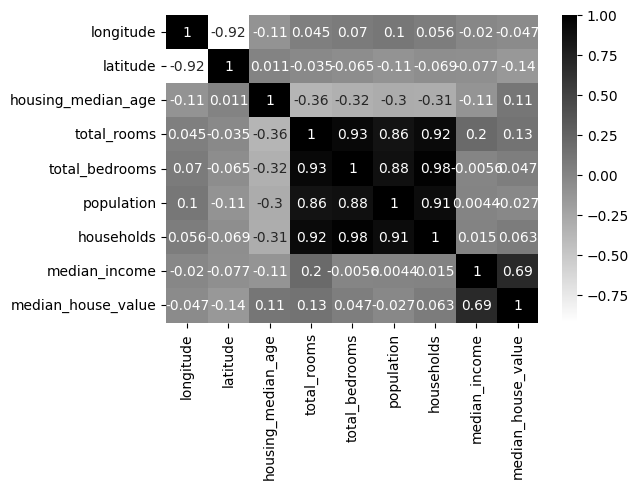

In [17]:
data_corr = data2.corr()
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(data_corr, annot=True, cmap=plt.cm.binary)

<div style="padding: 1%;border-style: dotted; border-width: 1px; border-color: #8038DB;">
<p> <u>observations</u> : 
<ul>
<li>la longitude et la latitude sont fortement corrélées négativement ce qui signifie que si la valeur d'une variable augmente l'autre diminue.e</li>
<li>Très forte corrélation entre les variables total_rooms, total_bedrooms, population, households  </li>
<li>Forte corrélation entre les variables median_income et median_housse_value</li>
</ul>
</p>
</div>

<div style="display:flex; justify-content: start; border-style: dotted; border-width: 1px; border-color: #8038DB;">
<p style="padding: 1%">
<i style="color:#8038DB;">Je décide de supprimer les lignes avec les valeurs manquantes car elles representent seulement 0.09% du total des valeurs. </i>
</p>
</div>

In [18]:
train.dropna()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
5,8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
6,5438,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN
7,14856,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN
8,19956,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...


In [24]:
train.to_csv('./data/train1.csv')